In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [179]:
df=pd.read_csv('predictive_maintenance_dataset.csv')
df

date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/2015  S1F01085        0  215630672       55        0       52   
1        1/1/2015  S1F0166B        0   61370680        0        3        0   
2        1/1/2015  S1F01E6Y        0  173295968        0        0        0   
3        1/1/2015  S1F01JE0        0   79694024        0        0        0   
4        1/1/2015  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489  11/2/2015  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/2015  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/2015  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/2015  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/2015  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0             6   407438        0        0        7  
1             6   403174        0        0        0  
2            12   237394        0        0        0  
3             6   410186        0        0        0  
4            15   313173        0        0        3  
...         ...      ...      ...      ...      ...  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0    70000  

[124494 rows x 12 columns]

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124494 non-null  object
 1   device   124494 non-null  object
 2   failure  124494 non-null  int64 
 3   metric1  124494 non-null  int64 
 4   metric2  124494 non-null  int64 
 5   metric3  124494 non-null  int64 
 6   metric4  124494 non-null  int64 
 7   metric5  124494 non-null  int64 
 8   metric6  124494 non-null  int64 
 9   metric7  124494 non-null  int64 
 10  metric8  124494 non-null  int64 
 11  metric9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [ ]:
!pip install ydata_profiling

In [187]:
from ydata_profiling import ProfileReport

In [188]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [181]:
df.isnull().sum()

date       0
device     0
failure    0
metric1    0
metric2    0
metric3    0
metric4    0
metric5    0
metric6    0
metric7    0
metric8    0
metric9    0
dtype: int64

In [182]:
df['failure'].value_counts()

failure
0    124388
1       106
Name: count, dtype: int64

In [183]:
df.shape

(124494, 12)

In [189]:
df.nunique()

date          304
device       1169
failure         2
metric1    123877
metric2       560
metric3        48
metric4       115
metric5        60
metric6     44838
metric7        28
metric8        28
metric9        67
dtype: int64

In [190]:
df['device'].unique()

array(['S1F01085', 'S1F0166B', 'S1F01E6Y', ..., 'S1F02XLX', 'S1F03499',
       'W1F1DA5ÿ'], dtype=object)

In [191]:
df['device'].value_counts()

device
Z1F0QLC1    304
S1F0KYCR    304
S1F0E9EP    304
S1F0EGMT    304
S1F0FGBQ    304
           ... 
W1F1CHZK      5
W1F1CJKT      5
S1F04KSC      4
W1F0WJFT      3
W1F1DA5ÿ      1
Name: count, Length: 1169, dtype: int64

In [192]:
df.duplicated().sum()

1

In [193]:
df.drop_duplicates(inplace=True)
df.shape

(124493, 12)

In [194]:
df

date    device  failure    metric1  metric2  metric3  metric4  \
0        1/1/2015  S1F01085        0  215630672       55        0       52   
1        1/1/2015  S1F0166B        0   61370680        0        3        0   
2        1/1/2015  S1F01E6Y        0  173295968        0        0        0   
3        1/1/2015  S1F01JE0        0   79694024        0        0        0   
4        1/1/2015  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489  11/2/2015  Z1F0MA1S        0   18310224        0        0        0   
124490  11/2/2015  Z1F0Q8RT        0  172556680       96      107        4   
124491  11/2/2015  Z1F0QK05        0   19029120     4832        0        0   
124492  11/2/2015  Z1F0QL3N        0  226953408        0        0        0   
124493  11/2/2015  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  
0             6   407438        0        0        7  
1             6   403174        0        0        0  
2            12   237394        0        0        0  
3             6   410186        0        0        0  
4            15   313173        0        0        3  
...         ...      ...      ...      ...      ...  
124489       10   353705        8        8        0  
124490       11   332792        0        0       13  
124491       11   350410        0        0        0  
124492       12   358980        0        0        0  
124493       10   351431        0        0    70000  

[124493 rows x 12 columns]

In [195]:
df['date']=pd.to_datetime(df['date'])
df['month']=df['date'].dt.month
df['week_day']=df['date'].dt.weekday
df['week_day'].replace(0,7,inplace=True)
df['day_of_month'] = df['date'].dt.day
df

date    device  failure    metric1  metric2  metric3  metric4  \
0      2015-01-01  S1F01085        0  215630672       55        0       52   
1      2015-01-01  S1F0166B        0   61370680        0        3        0   
2      2015-01-01  S1F01E6Y        0  173295968        0        0        0   
3      2015-01-01  S1F01JE0        0   79694024        0        0        0   
4      2015-01-01  S1F01R2B        0  135970480        0        0        0   
...           ...       ...      ...        ...      ...      ...      ...   
124489 2015-11-02  Z1F0MA1S        0   18310224        0        0        0   
124490 2015-11-02  Z1F0Q8RT        0  172556680       96      107        4   
124491 2015-11-02  Z1F0QK05        0   19029120     4832        0        0   
124492 2015-11-02  Z1F0QL3N        0  226953408        0        0        0   
124493 2015-11-02  Z1F0QLC1        0   17572840        0        0        0   

        metric5  metric6  metric7  metric8  metric9  month  week_day  \
0             6   407438        0        0        7      1         3   
1             6   403174        0        0        0      1         3   
2            12   237394        0        0        0      1         3   
3             6   410186        0        0        0      1         3   
4            15   313173        0        0        3      1         3   
...         ...      ...      ...      ...      ...    ...       ...   
124489       10   353705        8        8        0     11         7   
124490       11   332792        0        0       13     11         7   
124491       11   350410        0        0        0     11         7   
124492       12   358980        0        0        0     11         7   
124493       10   351431        0        0    70000     11         7   

        day_of_month  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
124489             2  
124490             2  
124491             2  
124492             2  
124493             2  

[124493 rows x 15 columns]

In [196]:
df1 = df.groupby('device').agg({'date':max})
df1.shape

(1169, 1)

In [197]:
df1

date
device             
S1F01085 2015-01-06
S1F013BB 2015-05-11
S1F0166B 2015-01-06
S1F01E6Y 2015-02-17
S1F01JE0 2015-01-06
...             ...
Z1F1VMZB 2015-10-19
Z1F1VQFY 2015-06-30
Z1F26YZB 2015-03-25
Z1F282ZV 2015-03-25
Z1F2PBHX 2015-04-06

[1169 rows x 1 columns]

In [198]:
df1=df1.reset_index()

df=df.reset_index(drop=True)

df2= pd.merge(df1,df,how='left',on=['device','date'])

df2.shape

(1169, 15)

In [199]:
df2

device       date  failure    metric1  metric2  metric3  metric4  \
0     S1F01085 2015-01-06        0  128832128       56        0       52   
1     S1F013BB 2015-05-11        0  115676688        0        0        0   
2     S1F0166B 2015-01-06        0    7441792        0        3        0   
3     S1F01E6Y 2015-02-17        0  147350000        0        0        0   
4     S1F01JE0 2015-01-06        0  185424928        0        0        0   
...        ...        ...      ...        ...      ...      ...      ...   
1164  Z1F1VMZB 2015-10-19        0   96949360        0        0        0   
1165  Z1F1VQFY 2015-06-30        1  178051496        0        0        0   
1166  Z1F26YZB 2015-03-25        0  229065488        0        1        0   
1167  Z1F282ZV 2015-03-25        0   72717600        0        1        0   
1168  Z1F2PBHX 2015-04-06        0  130522432        0        0        0   

      metric5  metric6  metric7  metric8  metric9  month  week_day  \
0           6   409404        0        0        7      1         1   
1           5   689161        0        0        0      5         7   
2           6   404786        0        0        0      1         1   
3          12   259491        0        0        0      2         1   
4           6   412151        0        0        0      1         1   
...       ...      ...      ...      ...      ...    ...       ...   
1164        5   263507        0        0        0     10         7   
1165        7   265316        0        0        0      6         1   
1166        1   292052        0        0        0      3         2   
1167        1   192919        0        0        0      3         2   
1168        5   164020        0        0        0      4         7   

      day_of_month  
0                6  
1               11  
2                6  
3               17  
4                6  
...            ...  
1164            19  
1165            30  
1166            25  
1167            25  
1168             6  

[1169 rows x 15 columns]

In [200]:
Id = df2.device.values.tolist()

In [201]:
Id1 = []
for i in Id:
    i = i[:4]
    Id1.append(i)

df2.device=Id1

df2.device.value_counts()

device
S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: count, dtype: int64

In [202]:
df2

device       date  failure    metric1  metric2  metric3  metric4  \
0      S1F0 2015-01-06        0  128832128       56        0       52   
1      S1F0 2015-05-11        0  115676688        0        0        0   
2      S1F0 2015-01-06        0    7441792        0        3        0   
3      S1F0 2015-02-17        0  147350000        0        0        0   
4      S1F0 2015-01-06        0  185424928        0        0        0   
...     ...        ...      ...        ...      ...      ...      ...   
1164   Z1F1 2015-10-19        0   96949360        0        0        0   
1165   Z1F1 2015-06-30        1  178051496        0        0        0   
1166   Z1F2 2015-03-25        0  229065488        0        1        0   
1167   Z1F2 2015-03-25        0   72717600        0        1        0   
1168   Z1F2 2015-04-06        0  130522432        0        0        0   

      metric5  metric6  metric7  metric8  metric9  month  week_day  \
0           6   409404        0        0        7      1         1   
1           5   689161        0        0        0      5         7   
2           6   404786        0        0        0      1         1   
3          12   259491        0        0        0      2         1   
4           6   412151        0        0        0      1         1   
...       ...      ...      ...      ...      ...    ...       ...   
1164        5   263507        0        0        0     10         7   
1165        7   265316        0        0        0      6         1   
1166        1   292052        0        0        0      3         2   
1167        1   192919        0        0        0      3         2   
1168        5   164020        0        0        0      4         7   

      day_of_month  
0                6  
1               11  
2                6  
3               17  
4                6  
...            ...  
1164            19  
1165            30  
1166            25  
1167            25  
1168             6  

[1169 rows x 15 columns]

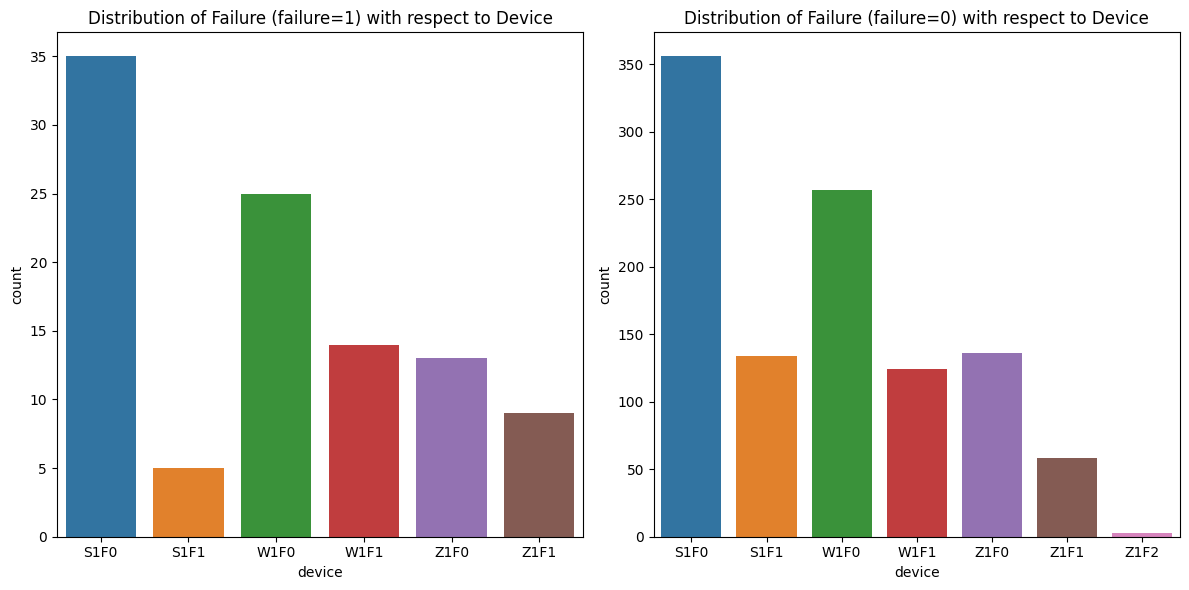

In [203]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x="device", data=df2.loc[df2["failure"] == 1],hue='device')
plt.title('Distribution of Failure (failure=1) with respect to Device')

plt.subplot(1, 2, 2)
sns.countplot(x="device", data=df2.loc[df2["failure"] == 0],hue='device')
plt.title('Distribution of Failure (failure=0) with respect to Device')

plt.tight_layout()
plt.show()

In [204]:
df2['device'].value_counts()

device
S1F0    391
W1F0    282
Z1F0    149
S1F1    139
W1F1    138
Z1F1     67
Z1F2      3
Name: count, dtype: int64

In [207]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169 entries, 0 to 1168
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   device        1169 non-null   object        
 1   date          1169 non-null   datetime64[ns]
 2   failure       1169 non-null   int64         
 3   metric1       1169 non-null   int64         
 4   metric2       1169 non-null   int64         
 5   metric3       1169 non-null   int64         
 6   metric4       1169 non-null   int64         
 7   metric5       1169 non-null   int64         
 8   metric6       1169 non-null   int64         
 9   metric7       1169 non-null   int64         
 10  metric8       1169 non-null   int64         
 11  metric9       1169 non-null   int64         
 12  month         1169 non-null   int32         
 13  week_day      1169 non-null   int32         
 14  day_of_month  1169 non-null   int32         
dtypes: datetime64[ns](1), int32(3), int64(

In [178]:
df2.nunique()

failure            2
metric1         1168
metric2          118
metric3           44
metric4           67
metric5           58
metric6         1135
metric7           22
metric9           64
month             11
week_day           7
day_of_month      29
device_S1F0        2
device_S1F1        2
device_W1F0        2
device_W1F1        2
device_Z1F0        2
device_Z1F1        2
device_Z1F2        2
dtype: int64

In [157]:
df2.drop('date',axis=1,inplace=True)

In [158]:
#metric 7 and metric 8 almost has the same values, so I will drop metric 8.
df2.drop('metric8',axis=1,inplace=True)

In [159]:
df2=pd.get_dummies(df2)
df2

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
0           0  128832128       56        0       52        6   409404   
1           0  115676688        0        0        0        5   689161   
2           0    7441792        0        3        0        6   404786   
3           0  147350000        0        0        0       12   259491   
4           0  185424928        0        0        0        6   412151   
...       ...        ...      ...      ...      ...      ...      ...   
1164        0   96949360        0        0        0        5   263507   
1165        1  178051496        0        0        0        7   265316   
1166        0  229065488        0        1        0        1   292052   
1167        0   72717600        0        1        0        1   192919   
1168        0  130522432        0        0        0        5   164020   

      metric7  metric9  month  week_day  day_of_month  device_S1F0  \
0           0        7      1         1             6         True   
1           0        0      5         7            11         True   
2           0        0      1         1             6         True   
3           0        0      2         1            17         True   
4           0        0      1         1             6         True   
...       ...      ...    ...       ...           ...          ...   
1164        0        0     10         7            19        False   
1165        0        0      6         1            30        False   
1166        0        0      3         2            25        False   
1167        0        0      3         2            25        False   
1168        0        0      4         7             6        False   

      device_S1F1  device_W1F0  device_W1F1  device_Z1F0  device_Z1F1  \
0           False        False        False        False        False   
1           False        False        False        False        False   
2           False        False        False        False        False   
3           False        False        False        False        False   
4           False        False        False        False        False   
...           ...          ...          ...          ...          ...   
1164        False        False        False        False         True   
1165        False        False        False        False         True   
1166        False        False        False        False        False   
1167        False        False        False        False        False   
1168        False        False        False        False        False   

      device_Z1F2  
0           False  
1           False  
2           False  
3           False  
4           False  
...           ...  
1164        False  
1165        False  
1166         True  
1167         True  
1168         True  

[1169 rows x 19 columns]

In [160]:
df2['device_S1F0'] = df2['device_S1F0'].astype(int)
df2['device_S1F1'] = df2['device_S1F1'].astype(int)
df2['device_W1F0'] = df2['device_W1F0'].astype(int)
df2['device_W1F1'] = df2['device_W1F1'].astype(int)
df2['device_Z1F0'] = df2['device_Z1F0'].astype(int)
df2['device_Z1F1'] = df2['device_Z1F1'].astype(int)
df2['device_Z1F2'] = df2['device_Z1F2'].astype(int)
df2

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
0           0  128832128       56        0       52        6   409404   
1           0  115676688        0        0        0        5   689161   
2           0    7441792        0        3        0        6   404786   
3           0  147350000        0        0        0       12   259491   
4           0  185424928        0        0        0        6   412151   
...       ...        ...      ...      ...      ...      ...      ...   
1164        0   96949360        0        0        0        5   263507   
1165        1  178051496        0        0        0        7   265316   
1166        0  229065488        0        1        0        1   292052   
1167        0   72717600        0        1        0        1   192919   
1168        0  130522432        0        0        0        5   164020   

      metric7  metric9  month  week_day  day_of_month  device_S1F0  \
0           0        7      1         1             6            1   
1           0        0      5         7            11            1   
2           0        0      1         1             6            1   
3           0        0      2         1            17            1   
4           0        0      1         1             6            1   
...       ...      ...    ...       ...           ...          ...   
1164        0        0     10         7            19            0   
1165        0        0      6         1            30            0   
1166        0        0      3         2            25            0   
1167        0        0      3         2            25            0   
1168        0        0      4         7             6            0   

      device_S1F1  device_W1F0  device_W1F1  device_Z1F0  device_Z1F1  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               0            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1164            0            0            0            0            1   
1165            0            0            0            0            1   
1166            0            0            0            0            0   
1167            0            0            0            0            0   
1168            0            0            0            0            0   

      device_Z1F2  
0               0  
1               0  
2               0  
3               0  
4               0  
...           ...  
1164            0  
1165            0  
1166            1  
1167            1  
1168            1  

[1169 rows x 19 columns]

Text(0.5, 1.0, "Distribution of 'failure'")

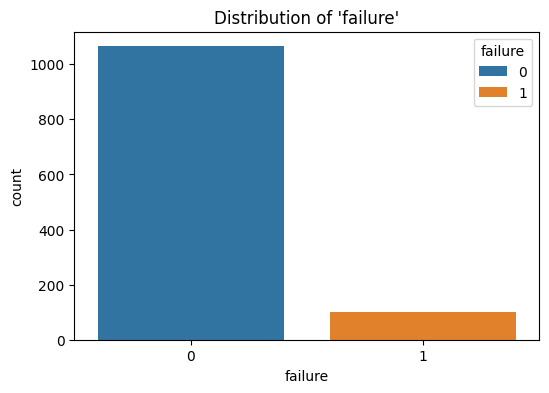

In [131]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df2, x='failure',hue='failure')
plt.title("Distribution of 'failure'")

In [161]:
df2.failure.value_counts()

failure
0    1068
1     101
Name: count, dtype: int64

In [162]:
x1= df2.drop('failure',axis=1)
y1= df2.failure

In [163]:
x1

metric1  metric2  metric3  metric4  metric5  metric6  metric7  \
0     128832128       56        0       52        6   409404        0   
1     115676688        0        0        0        5   689161        0   
2       7441792        0        3        0        6   404786        0   
3     147350000        0        0        0       12   259491        0   
4     185424928        0        0        0        6   412151        0   
...         ...      ...      ...      ...      ...      ...      ...   
1164   96949360        0        0        0        5   263507        0   
1165  178051496        0        0        0        7   265316        0   
1166  229065488        0        1        0        1   292052        0   
1167   72717600        0        1        0        1   192919        0   
1168  130522432        0        0        0        5   164020        0   

      metric9  month  week_day  day_of_month  device_S1F0  device_S1F1  \
0           7      1         1             6            1            0   
1           0      5         7            11            1            0   
2           0      1         1             6            1            0   
3           0      2         1            17            1            0   
4           0      1         1             6            1            0   
...       ...    ...       ...           ...          ...          ...   
1164        0     10         7            19            0            0   
1165        0      6         1            30            0            0   
1166        0      3         2            25            0            0   
1167        0      3         2            25            0            0   
1168        0      4         7             6            0            0   

      device_W1F0  device_W1F1  device_Z1F0  device_Z1F1  device_Z1F2  
0               0            0            0            0            0  
1               0            0            0            0            0  
2               0            0            0            0            0  
3               0            0            0            0            0  
4               0            0            0            0            0  
...           ...          ...          ...          ...          ...  
1164            0            0            0            1            0  
1165            0            0            0            1            0  
1166            0            0            0            0            1  
1167            0            0            0            0            1  
1168            0            0            0            0            1  

[1169 rows x 18 columns]

In [168]:
df2[df2['failure']==1]

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
8           1   64499464        0        0        1       19   514661   
27          1  110199904      240        0        0        8   294852   
48          1   77351504     2304        0        3        7   418563   
67          1  184069720      528        0        4        9   387871   
78          1   97170872     2576        0       60       12   462175   
...       ...        ...      ...      ...      ...      ...      ...   
1130        1    4527376        0        0        1        8   244782   
1148        1   13095344       32        0       10        7       24   
1156        1  163342800        0        0        6        7   239297   
1163        1  123190616    62296        1        9        4   336709   
1165        1  178051496        0        0        0        7   265316   

      metric7  metric9  month  week_day  day_of_month  device_S1F0  \
8          16        3      1         7            19            1   
27          0        0      8         7             3            1   
48          0        2      7         5            18            1   
67         32        3      1         2             7            1   
78          0        0      2         5            14            1   
...       ...      ...    ...       ...           ...          ...   
1130        0        0      5         1            12            0   
1148        0        0      5         4             8            0   
1156       24        0      1         7            19            0   
1163        0        0      5         7             4            0   
1165        0        0      6         1            30            0   

      device_S1F1  device_W1F0  device_W1F1  device_Z1F0  device_Z1F1  \
8               0            0            0            0            0   
27              0            0            0            0            0   
48              0            0            0            0            0   
67              0            0            0            0            0   
78              0            0            0            0            0   
...           ...          ...          ...          ...          ...   
1130            0            0            0            0            1   
1148            0            0            0            0            1   
1156            0            0            0            0            1   
1163            0            0            0            0            1   
1165            0            0            0            0            1   

      device_Z1F2  
8               0  
27              0  
48              0  
67              0  
78              0  
...           ...  
1130            0  
1148            0  
1156            0  
1163            0  
1165            0  

[101 rows x 19 columns]

In [164]:
y1

0       0
1       0
2       0
3       0
4       0
       ..
1164    0
1165    1
1166    0
1167    0
1168    0
Name: failure, Length: 1169, dtype: int64

In [165]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x1,y1,test_size=0.2)

In [166]:
from sklearn.ensemble import RandomForestClassifier
log=RandomForestClassifier()
log.fit(xtrain,ytrain)
log.score(xtest,ytest)

0.9316239316239316

In [176]:
log.predict([[178051496,0,0,0,7,265316,0,0,6,1,30,0,0,0,0,0,1,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

##TO BALANCE THE DATASET


In [208]:
df['device_model']=df['device'].apply(lambda x : x[:4])
df['device_model'].value_counts()

device_model
S1F0    33168
W1F0    23294
S1F1    21689
W1F1    19974
Z1F0    18869
Z1F1     7248
Z1F2      251
Name: count, dtype: int64

In [209]:
df.drop("device",axis=1,inplace=True)

In [210]:
df

date  failure    metric1  metric2  metric3  metric4  metric5  \
0      2015-01-01        0  215630672       55        0       52        6   
1      2015-01-01        0   61370680        0        3        0        6   
2      2015-01-01        0  173295968        0        0        0       12   
3      2015-01-01        0   79694024        0        0        0        6   
4      2015-01-01        0  135970480        0        0        0       15   
...           ...      ...        ...      ...      ...      ...      ...   
124488 2015-11-02        0   18310224        0        0        0       10   
124489 2015-11-02        0  172556680       96      107        4       11   
124490 2015-11-02        0   19029120     4832        0        0       11   
124491 2015-11-02        0  226953408        0        0        0       12   
124492 2015-11-02        0   17572840        0        0        0       10   

        metric6  metric7  metric8  metric9  month  week_day  day_of_month  \
0        407438        0        0        7      1         3             1   
1        403174        0        0        0      1         3             1   
2        237394        0        0        0      1         3             1   
3        410186        0        0        0      1         3             1   
4        313173        0        0        3      1         3             1   
...         ...      ...      ...      ...    ...       ...           ...   
124488   353705        8        8        0     11         7             2   
124489   332792        0        0       13     11         7             2   
124490   350410        0        0        0     11         7             2   
124491   358980        0        0        0     11         7             2   
124492   351431        0        0    70000     11         7             2   

       device_model  
0              S1F0  
1              S1F0  
2              S1F0  
3              S1F0  
4              S1F0  
...             ...  
124488         Z1F0  
124489         Z1F0  
124490         Z1F0  
124491         Z1F0  
124492         Z1F0  

[124493 rows x 15 columns]

In [211]:
#metric 7 and metric 8 almost has the same values, so I will drop metric 8.
df.drop('metric8',axis=1,inplace=True)

In [212]:
df.drop('date',axis=1,inplace=True)

In [213]:
df

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
0             0  215630672       55        0       52        6   407438   
1             0   61370680        0        3        0        6   403174   
2             0  173295968        0        0        0       12   237394   
3             0   79694024        0        0        0        6   410186   
4             0  135970480        0        0        0       15   313173   
...         ...        ...      ...      ...      ...      ...      ...   
124488        0   18310224        0        0        0       10   353705   
124489        0  172556680       96      107        4       11   332792   
124490        0   19029120     4832        0        0       11   350410   
124491        0  226953408        0        0        0       12   358980   
124492        0   17572840        0        0        0       10   351431   

        metric7  metric9  month  week_day  day_of_month device_model  
0             0        7      1         3             1         S1F0  
1             0        0      1         3             1         S1F0  
2             0        0      1         3             1         S1F0  
3             0        0      1         3             1         S1F0  
4             0        3      1         3             1         S1F0  
...         ...      ...    ...       ...           ...          ...  
124488        8        0     11         7             2         Z1F0  
124489        0       13     11         7             2         Z1F0  
124490        0        0     11         7             2         Z1F0  
124491        0        0     11         7             2         Z1F0  
124492        0    70000     11         7             2         Z1F0  

[124493 rows x 13 columns]

In [214]:
df=pd.get_dummies(df)
df

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
0             0  215630672       55        0       52        6   407438   
1             0   61370680        0        3        0        6   403174   
2             0  173295968        0        0        0       12   237394   
3             0   79694024        0        0        0        6   410186   
4             0  135970480        0        0        0       15   313173   
...         ...        ...      ...      ...      ...      ...      ...   
124488        0   18310224        0        0        0       10   353705   
124489        0  172556680       96      107        4       11   332792   
124490        0   19029120     4832        0        0       11   350410   
124491        0  226953408        0        0        0       12   358980   
124492        0   17572840        0        0        0       10   351431   

        metric7  metric9  month  week_day  day_of_month  device_model_S1F0  \
0             0        7      1         3             1               True   
1             0        0      1         3             1               True   
2             0        0      1         3             1               True   
3             0        0      1         3             1               True   
4             0        3      1         3             1               True   
...         ...      ...    ...       ...           ...                ...   
124488        8        0     11         7             2              False   
124489        0       13     11         7             2              False   
124490        0        0     11         7             2              False   
124491        0        0     11         7             2              False   
124492        0    70000     11         7             2              False   

        device_model_S1F1  device_model_W1F0  device_model_W1F1  \
0                   False              False              False   
1                   False              False              False   
2                   False              False              False   
3                   False              False              False   
4                   False              False              False   
...                   ...                ...                ...   
124488              False              False              False   
124489              False              False              False   
124490              False              False              False   
124491              False              False              False   
124492              False              False              False   

        device_model_Z1F0  device_model_Z1F1  device_model_Z1F2  
0                   False              False              False  
1                   False              False              False  
2                   False              False              False  
3                   False              False              False  
4                   False              False              False  
...                   ...                ...                ...  
124488               True              False              False  
124489               True              False              False  
124490               True              False              False  
124491               True              False              False  
124492               True              False              False  

[124493 rows x 19 columns]

In [215]:
df['device_model_S1F0'] = df['device_model_S1F0'].astype(int)
df['device_model_S1F1'] = df['device_model_S1F1'].astype(int)
df['device_model_W1F0'] = df['device_model_W1F0'].astype(int)
df['device_model_W1F1'] = df['device_model_W1F1'].astype(int)
df['device_model_Z1F0'] = df['device_model_Z1F0'].astype(int)
df['device_model_Z1F1'] = df['device_model_Z1F1'].astype(int)
df['device_model_Z1F2'] = df['device_model_Z1F2'].astype(int)
df

failure    metric1  metric2  metric3  metric4  metric5  metric6  \
0             0  215630672       55        0       52        6   407438   
1             0   61370680        0        3        0        6   403174   
2             0  173295968        0        0        0       12   237394   
3             0   79694024        0        0        0        6   410186   
4             0  135970480        0        0        0       15   313173   
...         ...        ...      ...      ...      ...      ...      ...   
124488        0   18310224        0        0        0       10   353705   
124489        0  172556680       96      107        4       11   332792   
124490        0   19029120     4832        0        0       11   350410   
124491        0  226953408        0        0        0       12   358980   
124492        0   17572840        0        0        0       10   351431   

        metric7  metric9  month  week_day  day_of_month  device_model_S1F0  \
0             0        7      1         3             1                  1   
1             0        0      1         3             1                  1   
2             0        0      1         3             1                  1   
3             0        0      1         3             1                  1   
4             0        3      1         3             1                  1   
...         ...      ...    ...       ...           ...                ...   
124488        8        0     11         7             2                  0   
124489        0       13     11         7             2                  0   
124490        0        0     11         7             2                  0   
124491        0        0     11         7             2                  0   
124492        0    70000     11         7             2                  0   

        device_model_S1F1  device_model_W1F0  device_model_W1F1  \
0                       0                  0                  0   
1                       0                  0                  0   
2                       0                  0                  0   
3                       0                  0                  0   
4                       0                  0                  0   
...                   ...                ...                ...   
124488                  0                  0                  0   
124489                  0                  0                  0   
124490                  0                  0                  0   
124491                  0                  0                  0   
124492                  0                  0                  0   

        device_model_Z1F0  device_model_Z1F1  device_model_Z1F2  
0                       0                  0                  0  
1                       0                  0                  0  
2                       0                  0                  0  
3                       0                  0                  0  
4                       0                  0                  0  
...                   ...                ...                ...  
124488                  1                  0                  0  
124489                  1                  0                  0  
124490                  1                  0                  0  
124491                  1                  0                  0  
124492                  1                  0                  0  

[124493 rows x 19 columns]

In [216]:
from imblearn.under_sampling import RandomUnderSampler

In [217]:
x=df.drop('failure',axis=1)
y=df['failure']

In [218]:
rus = RandomUnderSampler(random_state=42)

# Perform random under-sampling and obtain resampled feature matrix and target variable
x_resampled, y_resampled = rus.fit_resample(x, y)

In [219]:
under_sample = x_resampled.copy()
under_sample["failure"] = y_resampled

In [220]:
under_sample.sample(10)

metric1  metric2  metric3  metric4  metric5  metric6  metric7  metric9  \
46    35453896        0        0        0        8   247987        0        0   
120  163342800        0        0        6        7   239297       24        0   
167  130852088      200        0        0       16   285511        0        0   
103  180964440        0        0        0       60   243316        0        0   
42   229493928        0        0        0       90   249179        0        0   
82    59283112        0        0        0        5   242455        0        0   
165  243261216        0        0        0       10   255731        0        3   
33   108593408        0        0        0       12   313857        0        0   
23    84243120        0        1        0       78   245348        0      104   
130   46099450    21816        0      204       36   276221        0        1   

     month  week_day  day_of_month  device_model_S1F0  device_model_S1F1  \
46       1         4            16                  0                  0   
120      1         7            19                  0                  0   
167      5         4             8                  1                  0   
103      4         7            27                  0                  0   
42       6         1            30                  0                  0   
82       2         5            14                  0                  0   
165      5         3             7                  1                  0   
33       3         2            25                  0                  0   
23       5         7             4                  0                  0   
130      2         7             2                  0                  0   

     device_model_W1F0  device_model_W1F1  device_model_Z1F0  \
46                   0                  1                  0   
120                  0                  0                  0   
167                  0                  0                  0   
103                  0                  0                  1   
42                   1                  0                  0   
82                   1                  0                  0   
165                  0                  0                  0   
33                   0                  0                  1   
23                   0                  0                  1   
130                  1                  0                  0   

     device_model_Z1F1  device_model_Z1F2  failure  
46                   0                  0        0  
120                  1                  0        1  
167                  0                  0        1  
103                  0                  0        0  
42                   0                  0        0  
82                   0                  0        0  
165                  0                  0        1  
33                   0                  0        0  
23                   0                  0        0  
130                  0                  0        1

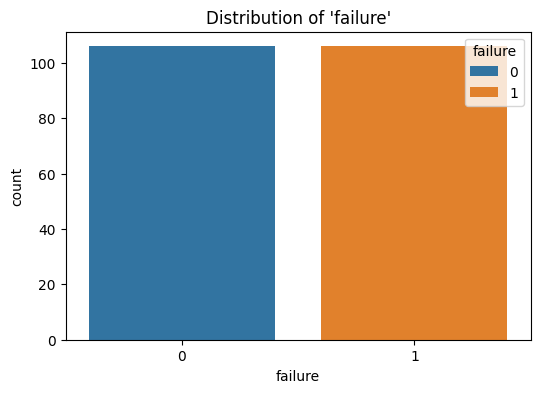

In [224]:
plt.figure(figsize=(6, 4))
sns.countplot(data=under_sample, x='failure',hue='failure')
plt.title("Distribution of 'failure'")
plt.show()

In [225]:
x_new=under_sample.drop(['failure'], axis=1)
y_new=under_sample['failure']

In [226]:
x_new

metric1  metric2  metric3  metric4  metric5  metric6  metric7  metric9  \
0    230167384        0        1        0       78   248405        0      104   
1    213984504        0        0        0       11   215150        0        1   
2     72819072        0        0        0       60   231427        0        0   
3     63686176        0        0        0        6   189700        0        0   
4     96497728        0        0       23       14   321995        0        8   
..         ...      ...      ...      ...      ...      ...      ...      ...   
207   16043296       88        0        0        9       30        0        0   
208   65654088        0        0        0        9   298592        0       11   
209   13739704        0        0       18        8   343760        0        0   
210   85259320        0        0      164        8   262932        0        0   
211   95073232        0        0        7        9   354861       22        0   

     month  week_day  day_of_month  device_model_S1F0  device_model_S1F1  \
0        8         7            10                  0                  0   
1        6         5            27                  0                  1   
2        1         1            13                  0                  0   
3        1         6             4                  0                  1   
4        1         6             4                  1                  0   
..     ...       ...           ...                ...                ...   
207      8         1             4                  0                  0   
208      8         1            18                  0                  0   
209     10         7             5                  1                  0   
210     10         4             9                  0                  0   
211     10         7            26                  0                  0   

     device_model_W1F0  device_model_W1F1  device_model_Z1F0  \
0                    0                  0                  1   
1                    0                  0                  0   
2                    0                  0                  1   
3                    0                  0                  0   
4                    0                  0                  0   
..                 ...                ...                ...   
207                  0                  1                  0   
208                  0                  0                  1   
209                  0                  0                  0   
210                  0                  0                  0   
211                  1                  0                  0   

     device_model_Z1F1  device_model_Z1F2  
0                    0                  0  
1                    0                  0  
2                    0                  0  
3                    0                  0  
4                    0                  0  
..                 ...                ...  
207                  0                  0  
208                  0                  0  
209                  0                  0  
210                  1                  0  
211                  0                  0  

[212 rows x 18 columns]

In [227]:
y_new

0      0
1      0
2      0
3      0
4      0
      ..
207    1
208    1
209    1
210    1
211    1
Name: failure, Length: 212, dtype: int64

In [228]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2)

In [229]:
x_test.shape

(43, 18)

In [234]:
from sklearn.ensemble import RandomForestClassifier
log=RandomForestClassifier()
log.fit(x_train,y_train)
log.score(x_test,y_test)

0.8604651162790697

In [241]:
log.predict([[16043296,88,0,0,9,30,0,0,8,1,4,0,0,0,1,0,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])